# Probability Distributions Assignment

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

1. A typist makes on average 2 mistakes per page. What is the probability of a particular page having no errors on it?

This problem relates to a Poisson distribution given that we have a fixed rate for the mistakes. Therefore lambda = 2 and X = 0.

We know that the rate of the typos is 2 per page, therefore lambda equals 2. Now we want to find the probability to fin 0 typos in one page. We do this using the Poisson probability mass function.

In [5]:
print('P(X = 0) = ',round(stats.poisson.pmf(0,2)*100,1))

P(X = 0) =  13.5


2. Components are packed in boxes of 20. The probability of any individual component being defective is 0.1. What is the probability of a box containing exactly 2 defective components?

This is the case of binomial distribution. The type of data is discrete and we're given the probability of 20 choose 1.

We use the binomial distribution to answer this question.

In [6]:
dist = stats.binom(20, 0.1)
print('P(X = 2) = ', round(dist.pmf(2)*100,1))

P(X = 2) =  28.5


3. Components are packed in boxes of 20. The probability of any individual component being defective is 0.1. What is the probability of a box containing AT MOST 2 defective components?

In this case we're not asked to find the probability of a given value but the cummlative probability at X = 2.

In [7]:
dist = stats.binom(n=20,p= 0.1)
print('P(X <= 2) = ', round(dist.cdf(2)*100,1))

P(X <= 2) =  67.7


4. Patrons arrive at a local bar at a rate of 30 per hour. What is the probability that the bouncer can take a three minute bathroom break without missing the next patron?

This case follows a Poisson distirbution with lambda = 1/2 shot per minute. Therefore we need to determine when X = 3.

In [8]:
print('P(X = 3) = ',round(stats.poisson.pmf(3,0.5)*100,1))

P(X = 3) =  1.3


5. You need to find a tall person, at least 6 feet tall, to help you reach a cookie jar. 8% of the population is 6 feet or taller, and people pass by on average twice per minute. If you wait on the sidewalk, what is the probability that you will have to wait longer than ten minutes to get some cookies?

 

This problem also follows an exponential distribution. We need adjust the rate (lambda) first so it makes sense for this problem. So we find 2 persons >= 6 ft tall every 25 people.

Now, we know that a person passes at a rate of 2 person every minute. Adjusting this to the probability of getting a tall person we get 0.16 persons every minute. Then we compute 1 - P(X = 1), so the result is the probability of waiting 11 or more minutes.

For this case exponential distribution takes theta as a parameter, this is 1/rate or 1/lambda.

In [68]:
dist = stats.expon(0,1/0.16)
print('P(X >= 10) = ', round((1-dist.pdf(11))*100,1))

P(X >= 10) =  97.2


6. A harried passenger will be several minutes late for a scheduled 10 A.M. flight to NYC. Nevertheless, he might still make the flight, since boarding is always allowed until 10:10 A.M., and boarding is sometimes permitted up to 10:30 AM.

Assuming the end time of the boarding interval is uniformly distributed over the above limits, find the probability that the passenger will make his flight, assuming he arrives at the boarding gate at 10:25.

In this case we know we have a uniform distribution of the event. So in this case we have a range of 20 minutes from the schedule time to the permitted time. Then we'll calculate the probability when X = 15.

In [38]:
dist = stats.uniform(0,20)
print('P(X = 15) = ',round(dist.pdf(15)*100,1))

P(X = 15) =  5.0


7. Your cat starts to beg for dinner at 3:30 every day, and you suspect that it meows at a fixed rate. You've observed that about one fifth of the time your cat will not meow until 3:40, giving you 10 unexpected minutes of quiet. What is the probability your cat leaves you alone for 30 minutes?

In this case the distribution is exponential. We know the probability that we have 10 spare minutes before the cat begs for food. With this information we can estimate the theta parameter of the distribution. So from the probability density function we solve for theta. And then use this value to determine the probability when X = 3.

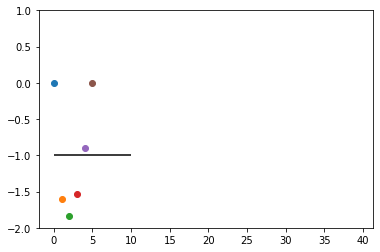

In [74]:
for i in range(40):
    result = np.log((i/5)**(i))
    plt.scatter(i, result)
    
plt.hlines(-1,0,10)
plt.ylim(-2,1);
    

From the graph above theta is close to 4.

In [73]:
dist = stats.expon(0,4)
print('P(X=3) = ',round(dist.pdf(4)*100,1))

P(X=3) =  9.2


8. Somehow you ended up with two types of forks. There are the good forks, which are big and fit a healthy bite, but there are also these small, thin ones that you don't really understand what they are for, you should probably just get rid of them. You need two forks for you and your partner, and grab a fistful of 5. If there are 14 forks in the drawer, of which half are the good kind, what is the probability you have at least your two required good forks?

This problem relates to a binomial distribition where it's necessary to determine the probability of choosing k items out of n items.

In [72]:
dist = stats.binom(5,0.5)
print('P(X = 2) = ',round(dist.pmf(2)*100,1))

P(X = 2) =  31.2


## Part 2

In [178]:

def prof_sample():
    
    nview_dist = stats.uniform(5000,1000)
    con_dist = stats.binom(nview_dist.rvs(1),0.12)
    wholesale_dist = stats.binom(con_dist.rvs(1),0.2)
    nonwhole_dist = stats.binom(con_dist.rvs(1),0.8)
    
    profit = con_dist.rvs(1)*(wholesale_dist.rvs(1)/con_dist.rvs(1)*50 + nonwhole_dist.rvs(1)/con_dist.rvs(1)*60)
    
    return profit


In [196]:
result = np.empty([10000,1])

for i in range(10000):
    
    result[i,0] = prof_sample()[0]

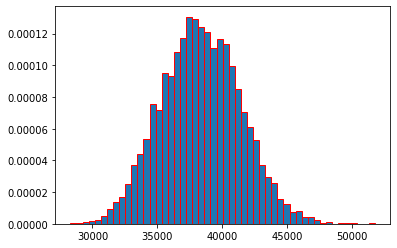

In [224]:
plt.hist(result, bins=50, edgecolor='red', density = True);

In [233]:
np.mean(result)
midd_95 = np.array([np.mean(result)-2*np.std(result),np.mean(result)+2*np.std(result)])
midd_95

array([32253.60529433, 44414.34489924])

In [61]:
np.array(range(16))*1/16
np.sum(np.array(range(16))*1/16)

7.5

In [77]:
dist = stats.binom(1000,0.005)
1-dist.cdf(9)

0.03146523851127825

In [85]:
unif_data =  np.array([ 12.74150234,   7.48813381,  11.7510409 ,   5.93809414,
                         4.68964288,   3.70627976,   3.46101127,   6.41408594,
                        10.21747766,   8.71674398,   3.60720254,   9.65162582,
                         6.58295132,   7.31954815,   7.49708025,   5.66849976,
                         6.35144344,  12.08445868,   7.80220492,   9.83051264,
                        12.19963228,   3.59743489,  11.4528373 ,   5.77606004,
                        10.68932553,  10.41001181,  12.31509935,  12.31377402,
                         9.99084698,   5.64170829,   4.8600061 ,   3.83064209,
                         5.80984023,  11.87182268,   8.62335338,   5.27884731,
                        12.12025134,   4.35138826,   4.26284551,   6.70120651,
                        12.91554048,  10.58164179,  10.33635382,   9.18362962,
                         7.06904495,  10.03298992,   5.95876344,   6.05199525,
                        10.08473599,   9.1744051 ])

In [95]:
from scipy.stats import norm
from itertools import product

def log_likelihood_normal_two_parameters(mu, sigma_sq, data_in):
    """
    Consume the parameters mu (mean) and sigma_sq (variance) of a normal
    distribution, and compute the likelihood of a fixed dataset (data_in).
    """
    normal = norm(mu, np.sqrt(sigma_sq))
    likelihoods = [normal.pdf(datum) for datum in data_in]
    return np.sum(np.log(likelihoods))

data = np.array([ 12.1085187 ,  12.10867427,  11.21137858,  10.01311363,
                  10.79744224,  13.19280269,  12.44086123,  11.88810057,
                  10.70064104,  11.50382741])



for mu,sigma_sq in product([10, 11, 12], [1.0, 1.1, 1.2]):
    print("Log-Lik of Two Parameter Normal Model With mu={0}, sigma_sq={1}: {2:3.2f}".format(
        mu, sigma_sq, log_likelihood_normal_two_parameters(mu, sigma_sq, data)))

Log-Lik of Two Parameter Normal Model With mu=10, sigma_sq=1.0: -25.92
Log-Lik of Two Parameter Normal Model With mu=10, sigma_sq=1.1: -24.88
Log-Lik of Two Parameter Normal Model With mu=10, sigma_sq=1.2: -24.04
Log-Lik of Two Parameter Normal Model With mu=11, sigma_sq=1.0: -14.96
Log-Lik of Two Parameter Normal Model With mu=11, sigma_sq=1.1: -14.91
Log-Lik of Two Parameter Normal Model With mu=11, sigma_sq=1.2: -14.91
Log-Lik of Two Parameter Normal Model With mu=12, sigma_sq=1.0: -13.99
Log-Lik of Two Parameter Normal Model With mu=12, sigma_sq=1.1: -14.03
Log-Lik of Two Parameter Normal Model With mu=12, sigma_sq=1.2: -14.10


In [103]:
p=56330/226977
56330*(1-p)

42350.30646276935

In [104]:
dist = stats.binom(108879,p)
dist.pmf(27213)

0.0011290441110788788

In [105]:
dist.cdf(27213)

0.9114657587436571